# Task 5

In [18]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as scp

%matplotlib inline

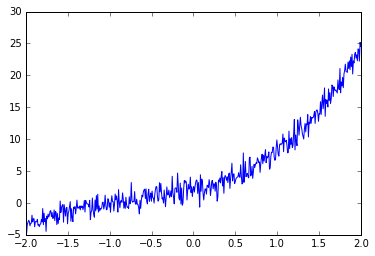

In [100]:
x = np.linspace(-2, 2, 500)

def func(x, a, b, c, d):
    return a*x**3 + b*(x**2) - c*x + d

a = 1
b = 2
c = -3
d = 2

y = func(x, 1 , 2, -3, 2) + np.random.normal(size = len(x))

plt.plot(x,y)
plt.show()

По график восстановим функцию, то есть зная вектора х и у и используя МНК, находим оценки коэффициетов полинома.

In [148]:
from scipy.optimize import minimize
from scipy.optimize import curve_fit

In [102]:
coef, coef_matrix = curve_fit(func, x, y)
print coef

[ 0.97738367  2.03720056 -3.07254693  2.04123241]


Для восстановленной функции найдем вектор значений

In [103]:
y1 = func(x, coef[0], coef[1], coef[2], coef[3])

In [169]:
from scipy.optimize import minimize_scalar 

def func_estimated(x):
    return coef[0]*x**3 + coef[1]*(x**2) - coef[2]*x + coef[3]

x_min = minimize_scalar(func_estimated, bounds = (-2, 2), method = 'bounded')
print x_min.x


-1.99999432662


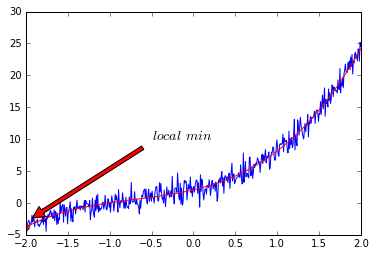

In [166]:
plt.plot(x, y, x, y1,'r', x_min.x , func_estimated(x_min.x), 'r-o')
plt.annotate('$local$ $min$', xy = (-2, -3), 
             xytext = (-0.5, 10), 
             arrowprops = dict(facecolor = 'red', shrink = 0.05), 
             fontsize = 14)
plt.show()